In [2]:
from mpl_toolkits.basemap import Basemap
from matplotlib.collections import LineCollection
import matplotlib as mpl
from matplotlib.colors import rgb2hex
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from sklearn.cluster import KMeans
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
import matplotlib.cm as cm
import matplotlib.colors as colors
import geopandas as gpd
from sklearn.model_selection import train_test_split
%matplotlib inline

In [3]:
df = pd.read_pickle('out_from_cluster_into_geoplotting.pkl')

In [16]:
df['spaces'] = ' '

In [17]:
df.head()
pd.Series()

,c_street_number,c_street,c_unit,c_city,c_state,c_zip_code,g_county,lat,lon,adj_address,price_per_sqft,price,sqft,bathrooms,bedrooms,dist_to_downtown,price_per_bed,min_dist_to_transport,spaces
1,12200,PRATOLINA DRIVE,None,AUSTIN,TX,78739,Travis County,30.186914,-97.928031,12200 PRATOLINA DRIVEAUSTIN TX 78739,155.697824,445542.635209,2861.585492,3.348373,4,20.553532,111385.658802,3.156990,
3,15302,DOROTHY DRIVE,None,AUSTIN,TX,78734,Travis County,30.352751,-97.956798,15302 DOROTHY DRIVEAUSTIN TX 78734,175.621617,609196.018461,3468.798588,3.773967,4,23.717263,152299.004615,11.432891,
4,2515,DREW LANE,None,AUSTIN,TX,78748,Travis County,30.169753,-97.833187,2515 DREW LANEAUSTIN TX 78748,173.795809,569972.071712,3279.550145,3.689396,4,13.735147,142493.017928,0.719679,
5,15404,JOSEPH DRIVE,None,AUSTIN,TX,78734,Travis County,30.354369,-97.957800,15404 JOSEPH DRIVEAUSTIN TX 78734,175.513849,605628.175255,3450.600493,3.766416,4,23.884909,151407.043814,11.240021,
7,11203,RANCH ROAD 2222,None,AUSTIN,TX,78730,Travis County,30.399156,-97.851646,11203 RANCH ROAD 2222AUSTIN TX 78730,250.800338,763918.922418,3045.924616,3.250597,3,18.323480,254639.640806,0.736829,


In [14]:
df[df['dist_to_downtown'] < (df.dist_to_downtown.std() * 4)].shape

(137129, 18)

In [15]:
(df.dist_to_downtown.std() * 4)

26.135692785823263

In [4]:
stops = gpd.read_file('data/Shapefiles_20-_20JANUARY_202018/Stops/Stops.shp')

Total number of bus stops: 2572


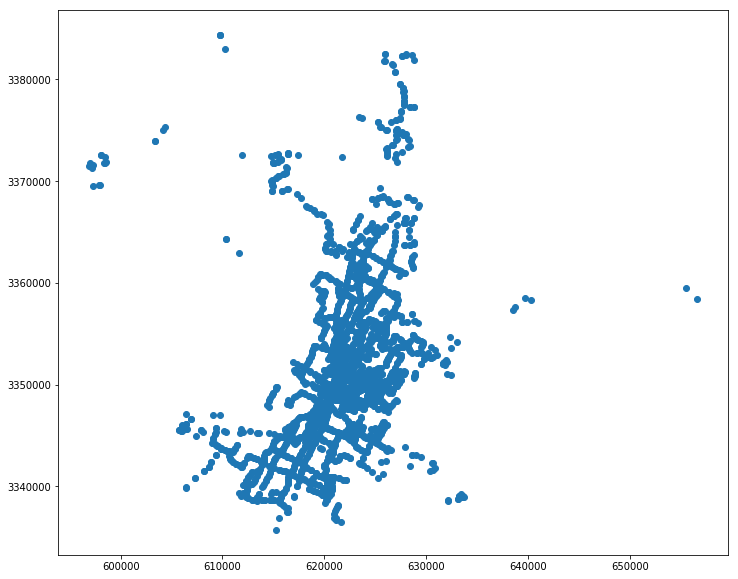

In [5]:
stops.plot(figsize=(12,12));
print('Total number of bus stops: ' + str(stops[stops['STOP_TYPE'] == 'Bus Stop'].shape[0]))

In [6]:
cluster = KMeans(n_clusters=3)

In [7]:
X = df[['min_dist_to_transport', 'price_per_bed', 'price_per_sqft']]

In [8]:
cluster.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [9]:
df['labels'] = cluster.labels_

In [10]:
X_train, X_test = train_test_split(df, test_size=0.01, stratify=df['labels'])

In [11]:
df.head()

,c_street_number,c_street,c_unit,c_city,c_state,c_zip_code,g_county,lat,lon,adj_address,price_per_sqft,price,sqft,bathrooms,bedrooms,dist_to_downtown,price_per_bed,min_dist_to_transport,labels
1,12200,PRATOLINA DRIVE,None,AUSTIN,TX,78739,Travis County,30.186914,-97.928031,12200 PRATOLINA DRIVEAUSTIN TX 78739,155.697824,445542.635209,2861.585492,3.348373,4,20.553532,111385.658802,3.156990,0
3,15302,DOROTHY DRIVE,None,AUSTIN,TX,78734,Travis County,30.352751,-97.956798,15302 DOROTHY DRIVEAUSTIN TX 78734,175.621617,609196.018461,3468.798588,3.773967,4,23.717263,152299.004615,11.432891,0
4,2515,DREW LANE,None,AUSTIN,TX,78748,Travis County,30.169753,-97.833187,2515 DREW LANEAUSTIN TX 78748,173.795809,569972.071712,3279.550145,3.689396,4,13.735147,142493.017928,0.719679,0
5,15404,JOSEPH DRIVE,None,AUSTIN,TX,78734,Travis County,30.354369,-97.957800,15404 JOSEPH DRIVEAUSTIN TX 78734,175.513849,605628.175255,3450.600493,3.766416,4,23.884909,151407.043814,11.240021,0
7,11203,RANCH ROAD 2222,None,AUSTIN,TX,78730,Travis County,30.399156,-97.851646,11203 RANCH ROAD 2222AUSTIN TX 78730,250.800338,763918.922418,3045.924616,3.250597,3,18.323480,254639.640806,0.736829,0


In [12]:
# # Read in data.
# colormap = plt.cm.Purples 

# aus_stop_file_dir = "data/cb_2017_us_zcta510_500k"
# os.chdir(aus_stop_file_dir)

# # Austin coordinates.
# lowerlon = -98.10 
# upperlon = -97.47
# lowerlat = 30.11
# upperlat = 30.55

# fig = plt.figure(figsize=(12,12))
# m = Basemap(
#     llcrnrlon=lowerlon,
#     llcrnrlat=lowerlat,
#     urcrnrlon=upperlon,
#     urcrnrlat=upperlat,
#     projection="lcc",
#     resolution="h",
#     lat_0=lowerlat,
#     lat_1=upperlat,
#     lon_0=lowerlon,
#     lon_1=upperlon
#     )

# shp_info = m.readshapefile(os.path.basename(aus_stop_file_dir), 'state')

# # get list of coordinates
# subset = df[['lat', 'lon', 'labels']]
# tuples = [tuple(x) for x in subset.values]

# for i in tuples:
#     if i[2] == 0:
#         color='b'
#     elif i[2] == 1:
#         color='r'
#     else:
#         color='y'
#     m.plot(i[0], i[1], color=color, markersize=1)
# #     print('plotted')


# m.drawrivers(linewidth=1, color='b')
# ;

''

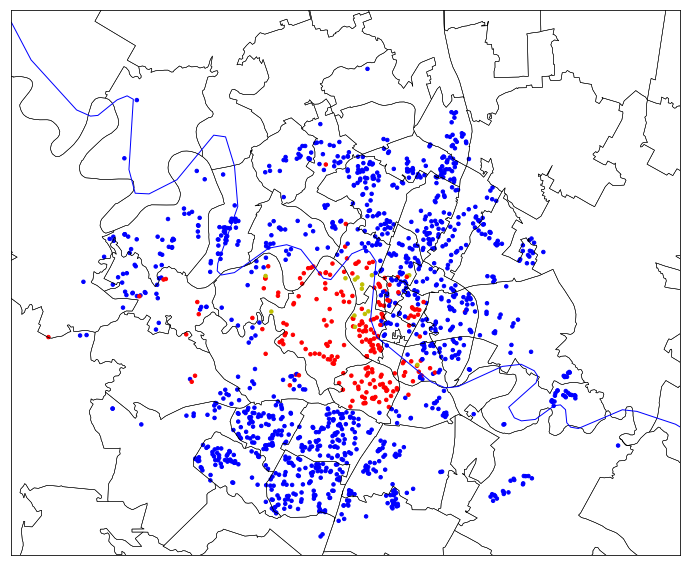

In [13]:
# Read in data.
colormap = plt.cm.Purples 

aus_stop_file_dir = "data/cb_2017_us_zcta510_500k"
os.chdir(aus_stop_file_dir)

# Austin coordinates.
lowerlon = -98.10 
upperlon = -97.47
lowerlat = 30.11
upperlat = 30.55

fig = plt.figure(figsize=(12,12))
m = Basemap(
    llcrnrlon=lowerlon,
    llcrnrlat=lowerlat,
    urcrnrlon=upperlon,
    urcrnrlat=upperlat,
    projection="lcc",
    resolution="h",
    lat_0=lowerlat,
    lat_1=upperlat,
    lon_0=lowerlon,
    lon_1=upperlon
    )

shp_info = m.readshapefile(os.path.basename(aus_stop_file_dir), 'state')

lats = X_test['lat'].to_numpy()
lons = X_test['lon'].to_numpy()
labels = X_test['labels'].to_numpy()
# tuples = [tuple(x) for x in subset.values]

colors = []
for i in labels:
    if i == 0:
        colors.append('b')
    elif i == 1:
        colors.append('r')
    else:
        colors.append('y')

x, y = m(lons, lats)
plt.scatter(x, y, 12, marker='o', color=colors)


# for i in tuples:
#     if i[2] == 0:
#         color='b'
#     elif i[2] == 1:
#         color='r'
#     else:
#         color='y'
#     m.scatter(i[0], i[1], color=color, zorder=5)



m.drawrivers(linewidth=1, color='b')
;

In [15]:
X_train2, X_test2 = train_test_split(df, test_size=0.1, stratify=df['labels'])

''

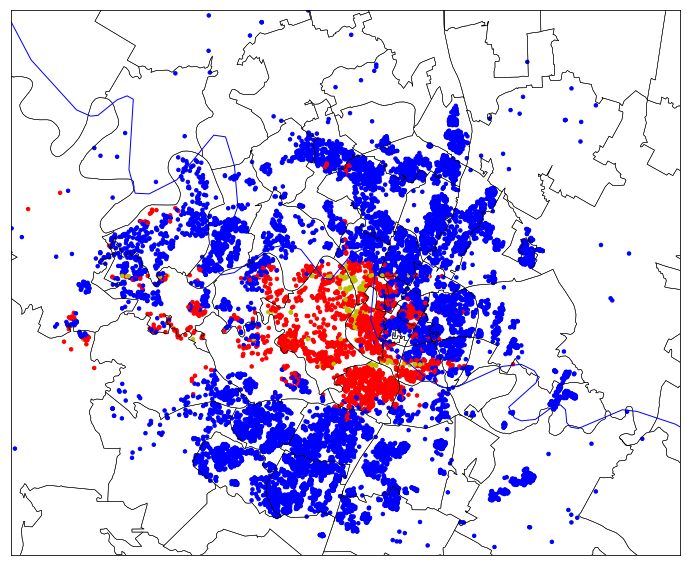

In [17]:
# Read in data.
colormap = plt.cm.Purples 

# aus_stop_file_dir = "data/cb_2017_us_zcta510_500k"
# os.chdir(aus_stop_file_dir)

# Austin coordinates.
lowerlon = -98.10 
upperlon = -97.47
lowerlat = 30.11
upperlat = 30.55

fig = plt.figure(figsize=(12,12))
m = Basemap(
    llcrnrlon=lowerlon,
    llcrnrlat=lowerlat,
    urcrnrlon=upperlon,
    urcrnrlat=upperlat,
    projection="lcc",
    resolution="h",
    lat_0=lowerlat,
    lat_1=upperlat,
    lon_0=lowerlon,
    lon_1=upperlon
    )

shp_info = m.readshapefile(os.path.basename(aus_stop_file_dir), 'state')

lats = X_test2['lat'].to_numpy()
lons = X_test2['lon'].to_numpy()
labels = X_test2['labels'].to_numpy()
# tuples = [tuple(x) for x in subset.values]

colors = []
for i in labels:
    if i == 0:
        colors.append('b')
    elif i == 1:
        colors.append('r')
    else:
        colors.append('y')

x, y = m(lons, lats)
plt.scatter(x, y, 12, marker='o', color=colors)


# for i in tuples:
#     if i[2] == 0:
#         color='b'
#     elif i[2] == 1:
#         color='r'
#     else:
#         color='y'
#     m.scatter(i[0], i[1], color=color, zorder=5)



m.drawrivers(linewidth=1, color='b')
;

In [2]:
import matplotlib.pyplot as plt